<img src="iteso_horizontal.png">
                                                                     
<h1><center> DEPARTAMENTO DE MATEMÁTICAS Y FÍSICA  </center></h1>                                                 <h3><center>Asignatura: Ciencia de Datos e Inteligencia de Negocios</center></h3>                          
<h3><center> EXAMEN 1 : Minería de Datos y Medidas de Similitud <h3><center> 
<h4><center>Tipo: A<h4><center>

<h1> Nombre: Daniela Benavides Herrera</h1>
<hr>   

<h2>Instrucciones</h2>

- Lea detenidamente los reactivos y responda con claridad. Si se requiere hacer uso de más hojas para la realización de cálculos, es necesario que se adjunten a este cuando se haga entrega del examen.

- Responda de manera ordenada los reactivos.

- Por cada respuesta de cada reactivo se calificará __código, figuras y comentarios__.


<h2>Tabla de Reactivos</h2>

1. [Reactivo 1 (4 ptos)](#Problema1)
2. [Reactivo 2 (2 ptos)](#Problema2)
3. [Reactivo 3 (4 ptos)](#Problema3)
<hr>   

<hr>   

### Reactivo 1 (4 ptos) <a name="Problema1"></a> 


Considere el dataset **dirty_dataset_v1.csv** una base de datos sucia que contiene la información de calificaciones de un conjunto de estudiantes. Realice lo siguiente:

- Limpie la base de datos, para valores nan en las columnas con valores númericos (int64, float64) rellene con el promedio en cada fila y para las columnas con cadenas de caracteres rellene con la etiqueta 'missing'. 
- Los registros que contengan cadenas de caracteres deberán limpiarce de tal forma que no contengan signos de puntuación.
- Cree un reporte de calidad de los datos para las variables limpias.
- Después de haber hecho la limpieza, para las variables **'gender'** y **'test preparation course'** deberán de estár en mayúsculas.

**Respuesta:**

In [1]:
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as skm 
import scipy.spatial.distance as sc 
#from CDIN import CDIN as dqr

In [3]:
#Limpie la base de datos, para valores nan en las columnas con valores númericos (int64, float64) rellene con el promedio en cada fila. 
df = pd.read_csv('../Data/dirty_dataset_v1.csv')
df = df.fillna(df.mean())
df = df.fillna('missing')
df.head(150)

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.00
1,1,female,group C,some college,standard,completed,69.0,90.0,88.00
2,2,female,group B,master's degree,standard,none,90.0,95.0,93.00
3,3,"m[a>l.e""",group A,associate's degree,free/reduced,none,47.0,57.0,44.00
4,4,male,group C,some college,standard,missing,76.0,78.0,68.12
...,...,...,...,...,...,...,...,...,...
145,145,female,group C,some college,free/reduced,none,22.0,39.0,33.00
146,146,male,missing,some high school,standard,none,88.0,84.0,68.12
147,147,male,group C,associate's degree,free/reduced,none,73.0,68.0,66.00
148,148,female,group D,bachelor's degree,standard,completed,68.0,75.0,81.00


In [17]:
# Los registros que contengan cadenas de caracteres deberán limpiarse de tal forma que no contengan signos de puntuación.
df = df.applymap(eda.remove_punctuation)
df.head(10)

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelors degree,standard,none,72.000000,72.000000,74.00
1,1,female,group C,some college,standard,completed,69.000000,90.000000,88.00
2,2,female,group B,masters degree,standard,none,90.000000,95.000000,93.00
3,3,male,group A,associates degree,freereduced,none,47.000000,57.000000,44.00
4,4,male,group C,some college,standard,missing,76.000000,78.000000,68.12
5,5,female,group B,associates degree,missing,none,71.000000,83.000000,78.00
6,6,female,group B,some college,standard,completed,88.000000,95.000000,92.00
7,7,male,group B,some college,freereduced,none,40.000000,69.111111,39.00
8,8,male,group D,high school,freereduced,completed,64.000000,64.000000,67.00
9,9,female,group B,high school,missing,none,66.204444,60.000000,50.00


In [18]:
# Cree un reporte de calidad de los datos para las variables limpias.
df_report = eda.dqr(df)
df_report

,Nombres,Data_Types,Missing_Values,present_values,Unique_Values,Min,Max
Unnamed: 0,Unnamed: 0,int64,0,1000,1000,0,999
gender,gender,object,0,1000,3,female,missing
race/ethnicity,race/ethnicity,object,0,1000,6,group A,missing
parental level of education,parental level of education,object,0,1000,7,associates degree,some high school
lunch,lunch,object,0,1000,3,freereduced,standard
test preparation course,test preparation course,object,0,1000,3,completed,none
math score,math score,float64,0,1000,80,0,100
reading score,reading score,float64,0,1000,72,17,100
writing score,writing score,float64,0,1000,76,10,100


In [19]:
# Después de haber hecho la limpieza, para las variables 'gender', 'test preparation course' deberán de estár en mayúsculas.
df['gender']=df['gender'].apply(eda.uppercase_text)
df['test preparation course'] = df['test preparation course'].apply(eda.uppercase_text)
df

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,FEMALE,group B,bachelors degree,standard,NONE,72.0,72.000000,74.00
1,1,FEMALE,group C,some college,standard,COMPLETED,69.0,90.000000,88.00
2,2,FEMALE,group B,masters degree,standard,NONE,90.0,95.000000,93.00
3,3,MALE,group A,associates degree,freereduced,NONE,47.0,57.000000,44.00
4,4,MALE,group C,some college,standard,MISSING,76.0,78.000000,68.12
...,...,...,...,...,...,...,...,...,...
995,995,FEMALE,group E,masters degree,standard,COMPLETED,88.0,99.000000,68.12
996,996,MALE,group C,high school,freereduced,MISSING,62.0,55.000000,55.00
997,997,FEMALE,group C,high school,freereduced,COMPLETED,59.0,71.000000,65.00
998,998,FEMALE,group D,some college,missing,COMPLETED,68.0,69.111111,68.12


<hr>   

### Reactivo 2 (2 ptos) <a name="Problema2"></a> 

Considere el dataset **paises_v1.csv** que contiene información de la población, superficie y deporte en cada país. Utilizando este archivo realice lo que se le pide.

- ¿Cúales son los países con más de 46 millones de habitantes?
- ¿Qué países tienen el nombre con mayor a 6 letras?
- Cree una nueva columna con el código del país (el código estará representado por las primeras 3 letras del nombre del país en MAYUSCULAS)

**Respuesta:**

In [20]:
#  ¿Cúales son los países con más de 46 millones de habitantes?
df_paises = pd.read_csv('../Data/paises_v1.csv')
df_paises[df_paises['Poblacion']>46000000][['Pais','Poblacion']]

,Pais,Poblacion
1,Colombia,48922000
2,Espana,47099000
3,Mexico,127212000


In [21]:
# ¿Qué países tienen el nombre con mayor a 6 letras?
df_paises[df_paises['Pais'].str.len()>6]['Pais']

0    Argentina
1     Colombia
4    Venezuela
Name: Pais, dtype: object

In [22]:
# Cree una nueva columna con el código del país (el código estará representado por las primeras 3 letras del nombre del país en MAYUSCULAS)


,Unnamed: 0,Pais,Poblacion,Superficie,Deporte,Codigo
0,1,Argentina,45167000,1964375,Futbol,ARG
1,3,Colombia,48922000,2780400,Futbol,COL
2,2,Espana,47099000,505944,Futbol,ESP
3,0,Mexico,127212000,1142748,Futbol,MEX
4,4,Venezuela,32423000,916445,Futbol,VEN


<hr>   

### Reactivo 3 (4 ptos) <a name="Problema3"></a> 

Del archivo con información de la contaminación de zona metropolitana **'Datos_2015.xlsx'**, se tomarán las mediciones de al menos 4 estaciones que miden la calidad del aire. Cada estación mide la cantidad de las siguientes sustancias: “CO”, “NO2”, “O3”, “PM10”, “SO2”, donde la frecuencia de medición es cada hora durante todo el año 2015.**
- Lea la tabla correspondiente al municipio **'Atemajac'** y obtenga un reporte de calidad de datos, describa brevemente la información básica de la base de datos.
- Limpie los datos para dejar sólo las columnas “CO”, “NO2”, “O3”, “PM10”, “SO2”.
- Grafique las variables 'CO', 'NO2' en una gráfica y 'NO2', PM10 en otra gráfica
- Obtenga la matriz de similitud con la métrica de distancia eulideana y la métrica de similitud por coseno, finalmente compare sus resultados.

**Respuesta:**

In [23]:
# Lea la tabla correspondiente al municipio 'Atemajac' y obtenga un reporte de calidad de datos, describa brevemente la información básica de la base de datos.
data = pd.read_excel('../Data/Datos_2015.xlsx', sheet_name = 'Atemajac')
data.head()

,Fecha,Hora,CO,NO2,O3,PM10,SO2,Unnamed: 7
0,2015-01-01 00:00:00,2015-01-01 00:00:00,0.603,0.01005,0.01695,43.95,0.00165,NaN
1,2015-01-01 01:00:00,2015-01-01 01:00:00,0.909,0.01510,0.01347,50.04,0.00190,NaN
2,2015-01-01 02:00:00,2015-01-01 02:00:00,1.835,0.02492,0.00273,46.23,0.00252,NaN
3,2015-01-01 03:00:00,2015-01-01 03:00:00,2.208,0.02338,0.00307,57.83,0.00298,NaN
4,2015-01-01 04:00:00,2015-01-01 04:00:00,1.473,0.01925,0.00223,56.66,0.00245,NaN


#### Data Quality Report

In [24]:
data_report = eda.dqr(data)
data_report

,Nombres,Data_Types,Missing_Values,present_values,Unique_Values,Min,Max
Fecha,Fecha,datetime64[ns],0,8760,8045,2015-01-01 00:00:00,2015-12-31 00:00:00
Hora,Hora,object,0,8760,8038,NaN,NaN
CO,CO,float64,563,8197,2227,0.013,7.467
NO2,NO2,float64,216,8544,2799,0,0.10793
O3,O3,float64,152,8608,3129,0.00115,0.11758
PM10,PM10,float64,244,8516,4624,1.97,263.95
SO2,SO2,float64,138,8622,634,0,0.02968
Unnamed: 7,Unnamed: 7,object,8759,1,1,NaN,NaN


#### Descripción de datos
Se puede observar la fecha y hora de los datos tomados (sustancias) en el municipio de Atemajac, y considero que es importante la fecha y hora ya que se puede concluir en qué hora del día y en qué momento del año se registraron mayores cantidades de ciertas sustancias.

In [25]:
# Limpie los datos para dejar sólo las columnas “CO”, “NO2”, “O3”, “PM10”, “SO2”.
indx = np.array(data.dtypes == 'float64')
col_list = list(data.columns.values[indx])
data_flt = data[col_list].dropna()
del indx
data_flt

,CO,NO2,O3,PM10,SO2
0,0.603,0.01005,0.01695,43.95,0.00165
1,0.909,0.01510,0.01347,50.04,0.00190
2,1.835,0.02492,0.00273,46.23,0.00252
3,2.208,0.02338,0.00307,57.83,0.00298
4,1.473,0.01925,0.00223,56.66,0.00245
...,...,...,...,...,...
8755,1.909,0.04198,0.00375,59.61,0.00316
8756,2.089,0.03922,0.00303,64.72,0.00318
8757,2.215,0.03733,0.00318,65.22,0.00319
8758,2.711,0.03528,0.00380,85.38,0.00344


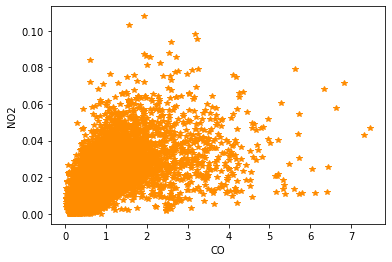

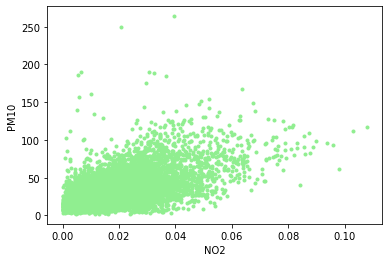

In [26]:
# Grafique las variables 'CO', 'NO2' en una gráfica y 'NO2', PM10 en otra gráfica
plt.figure()
plt.plot(data['CO'],data['NO2'],'*',color='darkorange')
plt.xlabel('CO')
plt.ylabel('NO2')
plt.show()

plt.figure()
plt.plot(data['NO2'],data['PM10'],'.',color='lightgreen')
plt.xlabel('NO2')
plt.ylabel('PM10')
plt.show()


In [27]:
# Obtenga la matriz de similitud con la métrica de distancia euclideana y la métrica de similitud por coseno, finalmente compare sus resultados.

# Euclidean
D1 = sc.pdist(data_flt,'euclidean')
D1 = sc.squareform(D1)
D1 = pd.DataFrame(data=D1)
D1

,0,1,2,3,4,5,6,7,8,9,...,7786,7787,7788,7789,7790,7791,7792,7793,7794,7795
0,0.000000,6.097686,2.591650,13.972501,12.739753,2.628878,3.602910,16.181809,13.334910,39.058944,...,2.141147,2.703012,2.639304,10.611124,2.119826,15.714402,20.823116,21.331019,41.483604,68.049963
1,6.097686,0.000000,3.920942,7.897574,6.643993,3.528676,9.538584,10.084890,7.250421,32.962572,...,3.957516,3.417485,8.735925,16.706336,3.981417,9.622147,14.727372,15.236097,35.385920,61.953690
2,2.591650,3.920942,0.000000,11.605996,10.436282,0.738372,5.690422,13.871717,10.990307,36.760007,...,1.176989,1.421849,5.120556,12.964312,1.044007,13.380216,18.491750,18.993806,39.159801,65.744711
3,13.972501,7.897574,11.605996,0.000000,1.381717,11.358822,17.295649,2.345692,0.675859,25.163013,...,11.840766,11.313258,16.610693,24.553094,11.853333,1.805034,6.891046,7.390016,27.554594,54.141584
4,12.739753,6.643993,10.436282,1.381717,0.000000,10.144954,16.122663,3.443017,0.714661,26.332282,...,10.600759,10.059483,15.378772,23.342478,10.621042,2.982133,8.083530,8.592118,28.746675,55.321935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,15.714402,9.622147,13.380216,1.805034,2.982133,13.111663,19.070550,0.571098,2.390103,23.380175,...,13.576990,13.038933,18.353669,26.310552,13.594902,0.000000,5.113170,5.618341,25.782478,52.364855
7792,20.823116,14.727372,18.491750,6.891046,8.083530,18.223911,24.182166,4.644117,7.501994,18.271997,...,18.684235,18.141800,23.462205,31.422835,18.704125,5.113170,0.000000,0.515635,20.669361,47.253007
7793,21.331019,15.236097,18.993806,7.390016,8.592118,18.729972,24.684091,5.154857,8.005564,17.774414,...,19.192571,18.651191,23.970211,31.928884,19.211812,5.618341,0.515635,0.000000,20.166101,46.751772
7794,41.483604,35.385920,39.159801,27.554594,28.746675,38.891104,44.849960,25.303670,28.171195,2.551044,...,39.343151,38.794393,44.121524,52.089142,39.366169,25.782478,20.669361,20.166101,0.000000,26.590149


In [28]:
# Cosine
D2 = sc.pdist(data_flt,'cosine')
D2 = sc.squareform(D2)
D2 = pd.DataFrame(data=D2)
D2

,0,1,2,3,4,5,6,7,8,9,...,7786,7787,7788,7789,7790,7791,7792,7793,7794,7795
0,0.000000,0.000010,0.000337,0.000299,0.000075,6.195542e-05,0.000445,8.690973e-05,1.954946e-04,0.000034,...,4.611936e-07,0.000006,0.000010,1.365973e-07,7.230312e-06,1.675068e-04,1.721196e-04,0.000205,1.624711e-04,0.000047
1,0.000010,0.000000,0.000231,0.000200,0.000031,2.234703e-05,0.000322,3.818230e-05,1.174707e-04,0.000007,...,7.042693e-06,0.000032,0.000040,1.113584e-05,3.568435e-07,9.601771e-05,9.951422e-05,0.000125,9.221148e-05,0.000014
2,0.000337,0.000231,0.000000,0.000001,0.000094,1.099392e-04,0.000007,8.162553e-05,1.912419e-05,0.000158,...,3.178847e-04,0.000434,0.000463,3.434815e-04,2.463701e-04,2.933697e-05,2.742450e-05,0.000016,3.145443e-05,0.000132
3,0.000299,0.000200,0.000001,0.000000,0.000074,8.868261e-05,0.000014,6.344955e-05,1.091710e-05,0.000132,...,2.809971e-04,0.000390,0.000418,3.050901e-04,2.140451e-04,1.894668e-05,1.740193e-05,0.000009,2.061363e-05,0.000109
4,0.000075,0.000031,0.000094,0.000074,0.000000,6.586449e-07,0.000154,4.174624e-07,2.811366e-05,0.000008,...,6.674750e-05,0.000125,0.000140,7.862289e-05,3.636674e-05,1.820225e-05,1.972305e-05,0.000032,1.653495e-05,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,0.000168,0.000096,0.000029,0.000019,0.000018,2.575241e-05,0.000066,1.319453e-05,1.144402e-06,0.000051,...,1.542354e-04,0.000238,0.000259,1.721283e-04,1.056906e-04,0.000000e+00,3.681527e-08,0.000002,7.965211e-08,0.000037
7792,0.000172,0.000100,0.000027,0.000017,0.000020,2.756695e-05,0.000063,1.447561e-05,7.758667e-07,0.000054,...,1.586979e-04,0.000243,0.000265,1.768490e-04,1.094064e-04,3.681527e-08,0.000000e+00,0.000001,1.563104e-07,0.000039
7793,0.000205,0.000125,0.000016,0.000009,0.000032,4.146374e-05,0.000046,2.491090e-05,1.255569e-07,0.000072,...,1.900519e-04,0.000282,0.000305,2.098965e-04,1.357147e-04,1.880988e-06,1.416181e-06,0.000000,2.449051e-06,0.000056
7794,0.000162,0.000092,0.000031,0.000021,0.000017,2.378528e-05,0.000070,1.174291e-05,1.529086e-06,0.000048,...,1.495058e-04,0.000232,0.000253,1.671490e-04,1.018350e-04,7.965211e-08,1.563104e-07,0.000002,0.000000e+00,0.000035


#### Comparar resultados

> Los resultados de la matriz de similitud con métrica de distancia euclideana presenta datos mucho más visuales, ya que utiliza el teorema de pitágoras para calcular la distancia entre un punto y otro y es más fácil decir que la cantidad de sustancias en el aire, a medida que pasa el año, va aumentando; mientras que en la matriz de similitud con métrica de distancia por coseno, la distancia calculada depende del ángulo entre 2 puntos y en su mayoría por lo que muestra datos dentro de un rango de -1 y 1, lo cual lo hace un poco más díficil de analizar, sobre todo porque son 7796 datos.